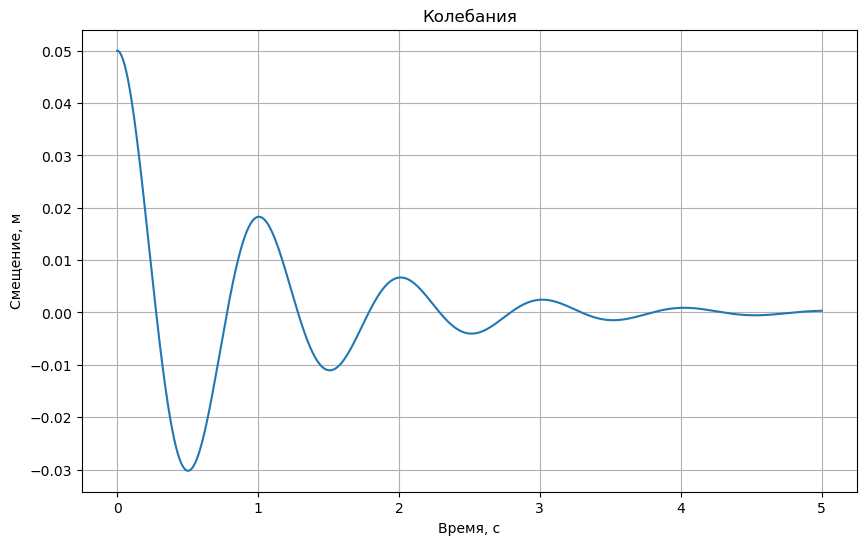

Теоретический период: 1.0061 с
Измеренный период: 1.0060 с
Энергия, рассеянная за 2 с: 0.004911 Дж


In [9]:
import matplotlib.pyplot as plt
import numpy as np

m = 0.1      # кг
k = 4        # Н/м
b = 0.2      # кг/с
x0_4 = 0.05  # м
v0_4 = 0     # м/с


omega_0 = np.sqrt(k / m) 
gamma = b / (2 * m)  
omega = np.sqrt(omega_0**2 - gamma**2)  

def get_xt(t, x0, v0):
    A = np.sqrt(x0**2 + ((gamma * x0 + v0)**2) / omega**2)
    phi = np.arctan2(-(gamma * x0 + v0), omega * x0)
    return A * np.exp(-gamma * t) * np.cos(omega * t + phi)

def get_vt(t, x0, v0):
    A = np.sqrt(x0**2 + ((gamma * x0 + v0)**2) / omega**2)
    phi = np.arctan2(-(gamma * x0 + v0), omega * x0)
    return -A * gamma * np.exp(-gamma * t) * np.cos(omega * t + phi) - \
           A * omega * np.exp(-gamma * t) * np.sin(omega * t + phi)

t_4 = np.linspace(0, 5, 1000)  #от 0 до 5 с
x_4 = get_xt(t_4, x0_4, v0_4)

plt.figure(figsize=(10, 6))
plt.plot(t_4, x_4)
plt.xlabel('Время, с')
plt.ylabel('Смещение, м')
plt.title('Колебания')
plt.grid(True)
plt.show()

# численно
T_theory = 2 * np.pi / omega
print(f"Теоретический период: {T_theory:.4f} с")

# по графику 
from scipy.signal import find_peaks
peaks, _ = find_peaks(x_4)
if len(peaks) > 1:
    T_measured = (t_4[peaks[1]] - t_4[peaks[0]])
    print(f"Измеренный период: {T_measured:.4f} с")

# энергия
t_heat = np.linspace(0, 2, 1000)
v_heat = get_vt(t_heat, x0_4, v0_4)
E_heat = b * np.trapz(v_heat**2, t_heat)
print(f"Энергия(рассеянная) за 2 с: {E_heat:.6f} Дж")

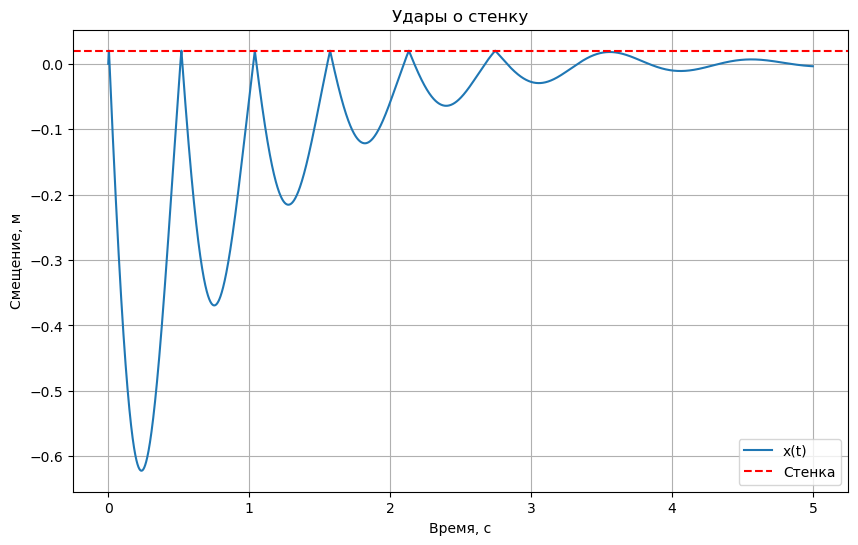

Количество ударов о стенку: 6


In [11]:
x0_5 = 0  # м
v0_5 = 5  # м/с
d = 0.02  # м

t_max = 5  
dt = 0.001  
t = np.arange(0, t_max, dt)
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0] = x0_5
v[0] = v0_5
hits = 0  

for i in range(1, len(t)):
    a = -(2 * gamma * v[i-1] + omega_0**2 * x[i-1])
    #(метод Эйлера)
    v[i] = v[i-1] + a * dt
    x[i] = x[i-1] + v[i-1] * dt
    if x[i] >= d:
        x[i] = d  
        v[i] = -v[i]  # упругий удар
        hits += 1

plt.figure(figsize=(10, 6))
plt.plot(t, x, label='x(t)')
plt.axhline(y=d, color='r', linestyle='--', label='Стенка')
plt.xlabel('Время, с')
plt.ylabel('Смещение, м')
plt.title('Удары о стенку')
plt.grid(True)
plt.legend()
plt.show()

print(f"Количество ударов о стенку: {hits}")